In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import helpers.processing_helpers as ph

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

In [2]:
df_dev = pd.read_csv("./dataset/development.csv")

In [3]:
noise_indexes = [0,7,12,15,16,17]
acc_idxs = [1,2,3,4,5,6,8,9,10,11,13,14]
features = ["pmax", "negpmax", 'area', 'tmax', 'rms']

sensors_removed = df_dev.drop(columns=ph.get_column_names(features, noise_indexes))
sensors_removed = sensors_removed.drop(columns=ph.get_column_names(['tmax', 'rms'], acc_idxs))

In [4]:
sample = sensors_removed.sample(20000)

threshold_acc = dict()

for i in range(0, 30, 2):
    print(i)
    X, y = ph.insert_zeros(sample, acc_idxs, i)

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=42)
    reg = RandomForestRegressor(100, random_state=42)
    reg.fit(X_train , y_train)

    med = ph.mean_euclid_dist(y_valid, reg.predict(X_valid))

    threshold_acc[i] = med

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28


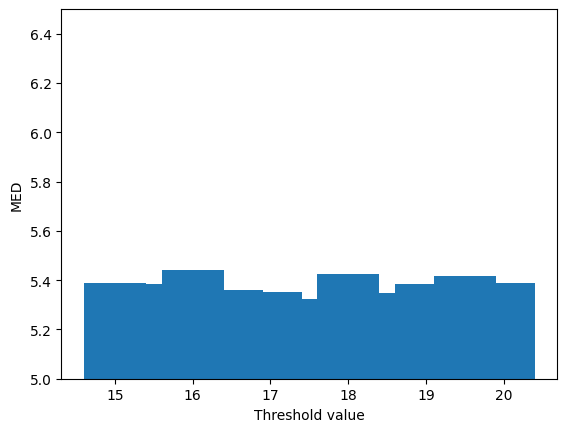

In [11]:
plt.bar(threshold_acc.keys(), threshold_acc.values())
plt.ylim(5,6.5)
plt.ylabel('MED')
plt.xlabel('Threshold value')
plt.show()

In [6]:
sample = sensors_removed.sample(20000)

threshold_acc = dict()

for i in range(10, 25, 1):
    print(i)
    X, y = ph.insert_zeros(sample, acc_idxs, i)

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=42)
    reg = RandomForestRegressor(100, random_state=42)
    reg.fit(X_train , y_train)

    med = ph.mean_euclid_dist(y_valid, reg.predict(X_valid))

    threshold_acc[i] = med

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


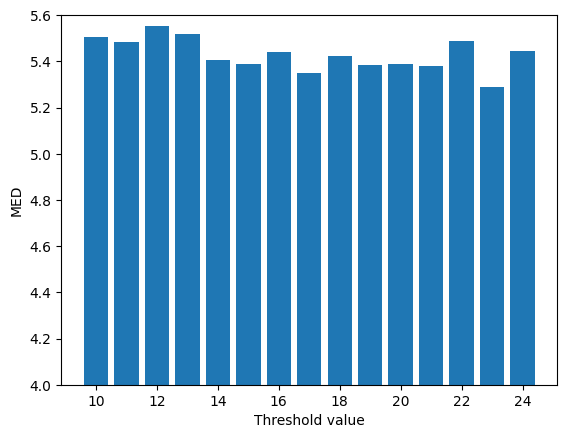

In [7]:
plt.bar(threshold_acc.keys(), threshold_acc.values())
plt.ylim(4,5.6)
plt.ylabel('MED')
plt.xlabel('Threshold value')
plt.show()

In [8]:
threshold_acc = dict()

for i in np.linspace(15,20,11):
    print(i)
    X, y = ph.insert_zeros(sample, acc_idxs, i)

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=42)
    reg = RandomForestRegressor(100, random_state=42)
    reg.fit(X_train , y_train)

    med = ph.mean_euclid_dist(y_valid, reg.predict(X_valid))

    threshold_acc[i] = med

15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0


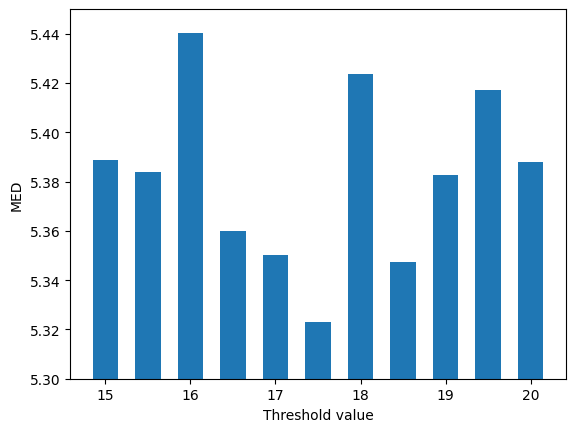

In [13]:
plt.bar(threshold_acc.keys(), threshold_acc.values(), width=0.3)
plt.ylim(5.3,5.45)
plt.ylabel('MED')
plt.xlabel('Threshold value')
plt.show()